## To-do list
- metrics functions
- check for directories structure (model for prediction, databases, saving directory for the drawdown/VaR/etc plots, backup directory for model, backup directory for plots)
- import metrics (VaR, cVaR, drawdown, etc.) functions from metrics module
- functions module maybe?
- Binance access and etc (copy from Touring)
- Copy keys.py explanation from Touring
- Two main fund strategies: (1) passive - trade on 1st of each month, keep in basked the 10 crytpos with the most market cap; (2) active - trade every week based on predicted returns for the next week
- Let the user define how many assets to invest into
- Tem que usar sentiment analysis de twitter, reddit, google news, etc. Trabalhar com dados em T+0 e em T-1, T-2, T-3...
- Faz defasagem para RSI também
- Ver se tem algum dado de taxa de juros americana/europeia/chinesa(?)/japonesa diária
- Ou algum dado 'mundial' para ajudar na intepretação dos dados
- Também trabalhar com defasagens (1, 2, 3...) nesses dados
- When using Markovwitz, use pypfopt package


In [1]:
#------ Import basic packages
#import matplotlib.pyplot as plt
#import seaborn as sns
#import smtplib  # Needed for the e-mail reports
#import binance.enums  # Responsible for trading

import numpy as np
import pandas as pd
#import pandas_ta
from functions import *
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [ ]:
#from metrics import mvcriterion, optim_mvcrit

#wallet = binance_wallet()

# fetch_data() checks for the most liquid cryptos and fetches the data from Binance
data = fetch_data(days=365*2, interval='1d')
#data.drop('cluster_num', axis=1, inplace=True)

# Let's calculate the technical indicators
data = estimate_indicators(data, rsi=20, bbands=20, roll=13)

# After the indicators are calculated, perform the normalization of the values
print('Normalizing the "close" values...')
normalized_close = data.groupby(level='asset')['close'].apply(lambda x:
                                                              np.subtract(x, data.groupby(level='asset')['close'].mean())/data.groupby(level='asset')['close'].std()
                                                              )

# Register the normalized close into the df
data['close_norm'] = np.array(normalized_close)
print('"close" values normalized and added to the dataframe.')

# Now we need to estimate the optimal number of clusters to
# allocate our resources
clust = estimate_kmeans(data.drop('close', axis=1), cutoff=0.2)

# Sets the params for the clustering function used with apply below
params2 = {'clusters':clust,
           'means':1,
           'metric':'rsi'}

# Groups the data and applies the clustering
data = data.dropna().groupby('time', group_keys=False).apply(clustering, **params2)

Checking for trading pairs...
The resources directory exists, checking for trade pairs file.
Trading pairs file 'pairs_202508.csv' found, checking version.
Trading pairs file is up to date.
Loading pairs.
Pairs successfully loaded.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All 

/home/thiago/.pyenv/versions/3.12.3/lib/python3.12/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


Calculating RSI (momentum).
Calculating Bollinger Bands (vol).
Calculating ATR (vol).
Calculating MACD (momentum).
Calculating dollar volume in millions.
Creating dollar volume moving averages.
Checking cryptos liquidity.
Creating a rank for the best cryptos in the dataset.
Estimating returns.
All indicators successfuly calculated.
Normalizing the "close" values...
"close" values normalized and added to the dataframe.


### Down here are the tweaked functions:

In [20]:
data.drop('cluster_num', axis=1, inplace=True)
clust = estimate_kmeans(data.drop('close', axis=1), cutoff=0.2)

# Sets the params for the clustering function used with apply below
params2 = {'clusters':clust,
           'means':1,
           'metric':'rsi'}

# Groups the data and applies the clustering
data = data.dropna().groupby('time', group_keys=False).apply(clustering, **params2)

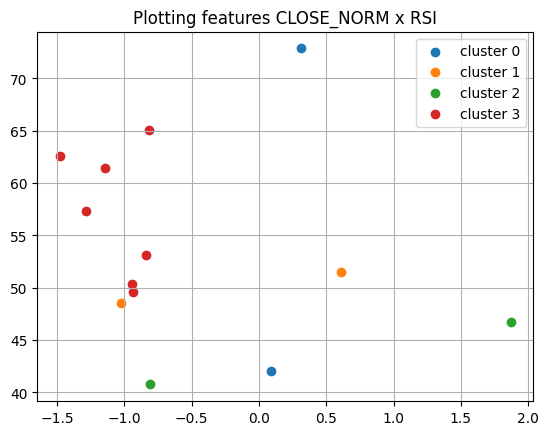

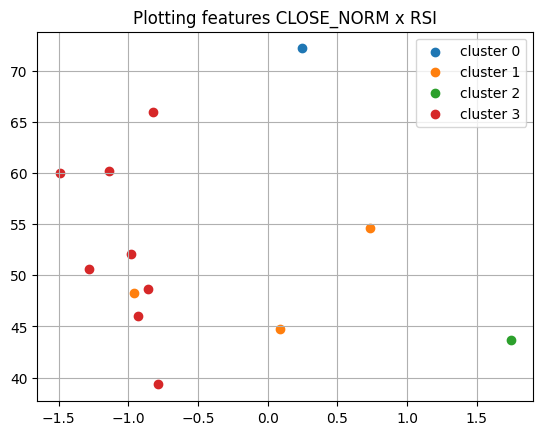

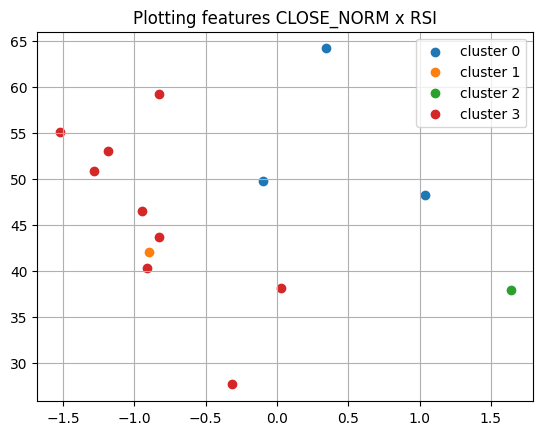

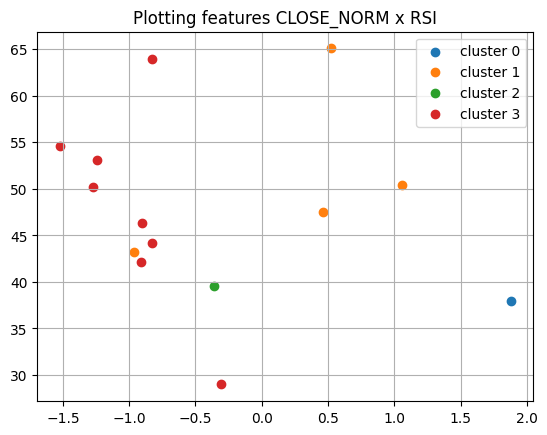

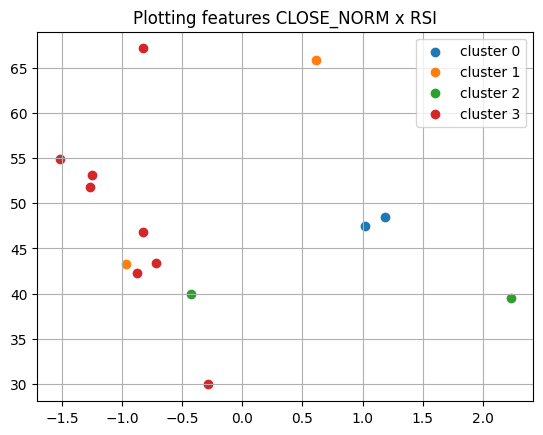

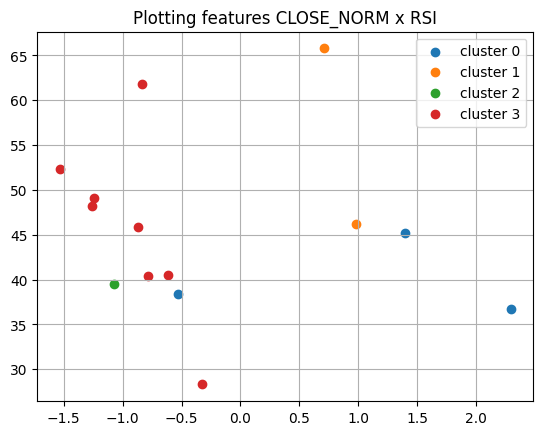

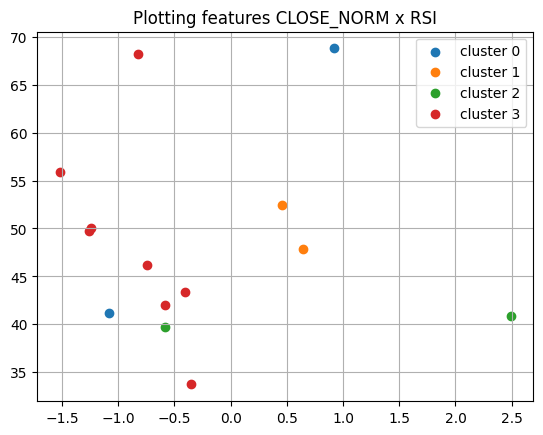

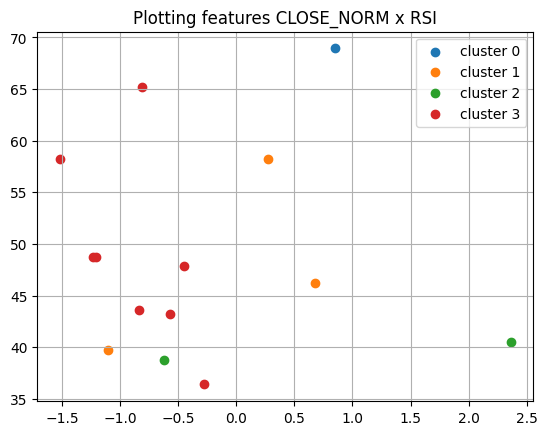

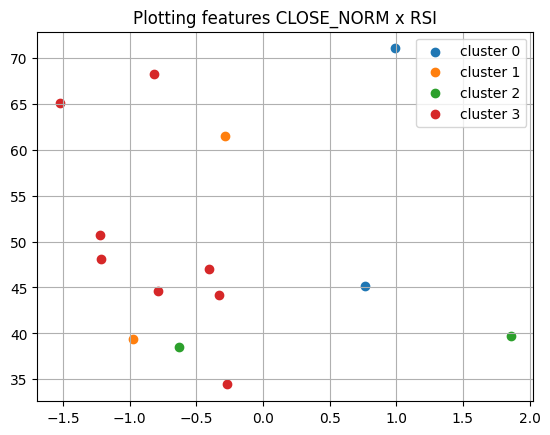

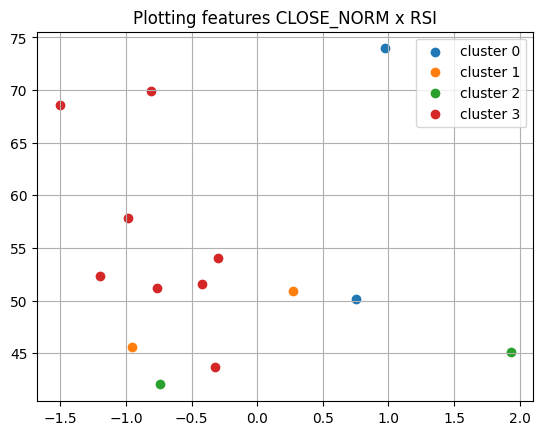

In [21]:
# Prints the clustering graph
times = data.index.get_level_values('time').unique().to_list()[0:10]
for t in times:
    g = data.xs(t, level=1)
    plot_clusters(g)